In [2]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.figure import Figure as plt_Figure
from matplotlib.axes import Axes as plt_Axes
from skimage import io
from skimage.transform import resize, rescale
from skimage.color import rgb2gray
import numpy as np
from typing import cast
import random

# Obraz psa
img_dog = io.imread("./lab1/dog_1.jpg")
# Obraz Leny
img_lena = io.imread("./input1/lena.png")

## Zadanie 1

In [3]:
def cut_to_square(img: np.ndarray) -> np.ndarray:
    """
    Funkcja przycina obraz do kwadratu, używając operatora `slicing`'u

    :param img: Oryginalny obraz
    :return: Zdjęcie wykadrowane do kwadratu
    """
    h, w, _ = img.shape

    if w > h:
        offset = int((w - h) / 2)
        return img[:, offset:h+offset]
    else:
        offset = int((h - w) / 2)
        return img[offset:w+offset, :]

In [4]:
def expand_to_square(img: np.ndarray) -> np.ndarray:
    """
    Funkcja rozszerza obraz do kwadratu, używając konkatenacji macierzy

    :param img: Oryginalny obraz
    :return: Zdjęcie rozszerzone do kwadratu za pomocą czarnych marginesów
    """
    h, w, _ = img.shape

    if w > h:
        offset = int((w - h) / 2)

        return np.vstack((
            np.zeros((offset, w, 3), dtype=np.uint8),
            img,
            np.zeros((offset, w, 3), dtype=np.uint8)
        ))
    else:
        offset = int((h - w) / 2)

        return np.hstack((
            np.zeros((h, offset, 3), dtype=np.uint8),
            img,
            np.zeros((h, offset, 3), dtype=np.uint8)
        ))

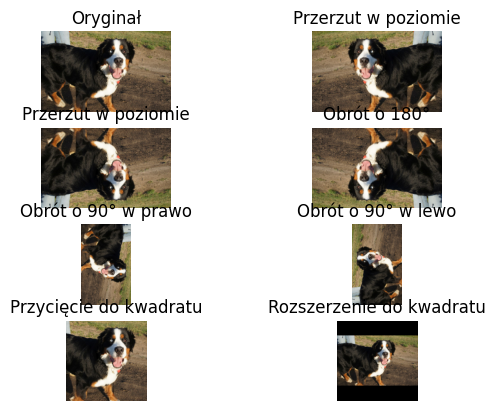

In [5]:
fig: plt_Figure
axs: np.ndarray[(4, 2), plt_Axes]
fig, axs = plt.subplots(4, 2)

cast(plt_Axes, axs[0, 0]).imshow(img_dog)
cast(plt_Axes, axs[0, 0]).axis("off")
cast(plt_Axes, axs[0, 0]).set_title("Oryginał")

cast(plt_Axes, axs[0, 1]).imshow(img_dog[:, ::-1])
cast(plt_Axes, axs[0, 1]).axis("off")
cast(plt_Axes, axs[0, 1]).set_title("Przerzut w poziomie")

cast(plt_Axes, axs[1, 0]).imshow(img_dog[::-1, :])
cast(plt_Axes, axs[1, 0]).axis("off")
cast(plt_Axes, axs[1, 0]).set_title("Przerzut w poziomie")

cast(plt_Axes, axs[1, 1]).imshow(img_dog[::-1, ::-1])
cast(plt_Axes, axs[1, 1]).axis("off")
cast(plt_Axes, axs[1, 1]).set_title("Obrót o 180°")

cast(plt_Axes, axs[2, 0]).imshow(np.rot90(img_dog, axes=(-2, 0)))
cast(plt_Axes, axs[2, 0]).axis("off")
cast(plt_Axes, axs[2, 0]).set_title("Obrót o 90° w prawo")

cast(plt_Axes, axs[2, 1]).imshow(np.rot90(img_dog, axes=(0, 1)))
cast(plt_Axes, axs[2, 1]).axis("off")
cast(plt_Axes, axs[2, 1]).set_title("Obrót o 90° w lewo")
cast(plt_Axes, axs[1, 1]).set_title("Obrót o 180°")

cast(plt_Axes, axs[3, 0]).imshow(cut_to_square(img_dog))
cast(plt_Axes, axs[3, 0]).axis("off")
cast(plt_Axes, axs[3, 0]).set_title("Przycięcie do kwadratu")

cast(plt_Axes, axs[3, 1]).imshow(expand_to_square(img_dog))
cast(plt_Axes, axs[3, 1]).axis("off")
cast(plt_Axes, axs[3, 1]).set_title("Rozszerzenie do kwadratu")

plt.axis(False)
plt.show()

## Zadanie 2

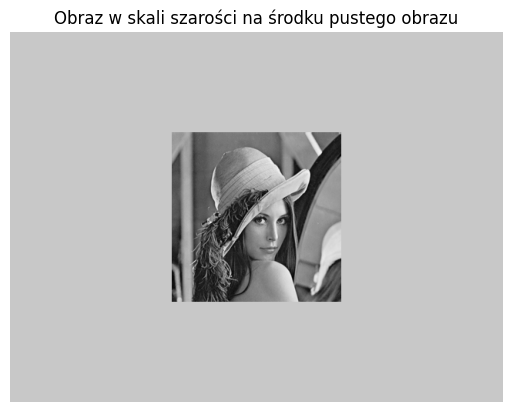

In [6]:
img_lena_gray = rgb2gray(img_lena)
new_img = np.full((480, 640), 0.75)

h, w, _ = img_lena.shape

h_offset = int((480 - h) / 2)
w_offset = int((640 - w) / 2)

new_img[h_offset:h_offset+h, w_offset:w_offset+w] = img_lena_gray

plt.imshow(new_img, cmap="gray")
plt.axis(False)
plt.title("Obraz w skali szarości na środku pustego obrazu")
plt.show()

## Zadanie 3

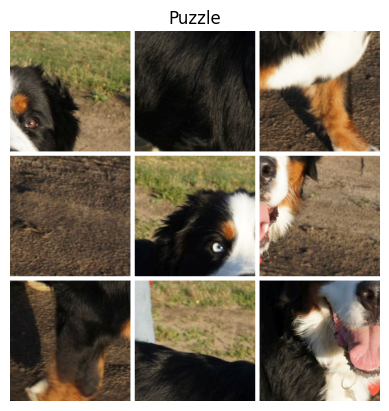

In [7]:
img_dog_square = cut_to_square(img_dog)
s= img_dog_square.shape[0]
s = s - (s % 3)
img_dog_square = img_dog_square[:s, :s]

chunks = np.array(np.split(np.array(np.split(img_dog_square, 3, axis=1)), 3, axis=1))

_, _, h, w, d = chunks.shape
ch = chunks.reshape((9, h, w, d))
np.random.shuffle(ch)

h_margin = np.full((h, 8, 3), 255)
v_margin = np.full((8, (w * 3 + 8 * 2), 3), 255)

final_img = np.vstack([
    np.hstack([ch[0], h_margin, ch[1], h_margin, ch[2]]),
    v_margin,
    np.hstack([ch[3], h_margin, ch[4], h_margin, ch[5]]),
    v_margin,
    np.hstack([ch[6], h_margin, ch[7], h_margin, ch[8]])
])

plt.imshow(final_img)
plt.axis(False)
plt.title("Puzzle")
plt.show()

## Zadanie 4

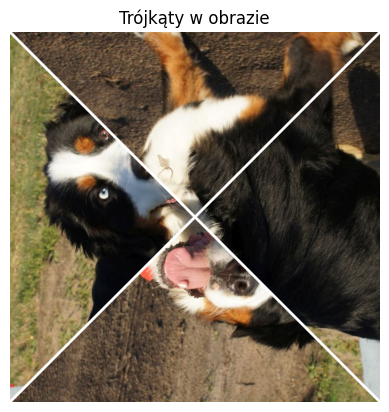

In [104]:
s = img_dog_square.shape[0]

bl = np.tri(s, s, -4)
br = bl[:, ::-1]
tr = bl[::-1, ::-1]
tl = bl[::-1, :]

t = np.logical_and(tl, tr)
r = np.logical_and(br, tr)
b = np.logical_and(bl, br)
l = np.logical_and(bl, tl)

imgz = [
    img_dog_square,
    np.rot90(img_dog_square, 3, axes=(0, 1)),
    np.rot90(img_dog_square, 2, axes=(0, 1)),
    np.rot90(img_dog_square, 1, axes=(0, 1)),
]

empty_img = np.full((s, s, 3), 255)

indices = [0, 1, 2, 3]
random.shuffle(indices)

empty_img[t == 1, :] = imgz[(indices[0] + 0) % 4][t == 1]
empty_img[r == 1, :] = imgz[(indices[1] + 1) % 4][r == 1]
empty_img[b == 1, :] = imgz[(indices[2] + 2) % 4][b == 1]
empty_img[l == 1, :] = imgz[(indices[3] + 3) % 4][l == 1]

plt.imshow(empty_img)
plt.axis(False)
plt.title("Trójkąty w obrazie")
plt.show()